In [1]:
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

In [2]:
n=10000
k=1
p=2

var_A = 1
var_Y = 0.5

lambda_common = [[2],[1]]

H_mean = np.zeros((k,))
H_covar = np.identity(k)
B = [100]
F = [2,1]

In [3]:
H_set = np.empty((k,n), dtype = np.float64)
Z_set = np.empty((p,n), dtype = np.float64)
A_set = np.empty((n), dtype = int)
Y_set = np.empty((n), dtype = np.float64)

In [5]:
for i in range(n):
    epsilon = np.random.multivariate_normal(np.zeros((p,)), np.zeros((p,p)))
    epsilon_A = np.random.normal(0, var_A)
    
    H = np.random.multivariate_normal(H_mean, H_covar)
    Z = np.dot(lambda_common, H) + epsilon
    A_star = np.dot(B,H) + epsilon_A
    A = 1 if (A_star >= 0) else 0
    Y = np.dot([1],H)*A + np.dot([2],H)*(1-A)
    
    H_set[:,i] = H.T
    Z_set[:,i] = Z.T
    A_set[i] = A
    Y_set[i] = Y

(array([   6.,   59.,  328., 1220., 2520., 2994., 1925.,  761.,  167.,
          20.]),
 array([-4.05726031, -3.28844542, -2.51963054, -1.75081566, -0.98200077,
        -0.21318589,  0.55562899,  1.32444388,  2.09325876,  2.86207365,
         3.63088853]),
 <BarContainer object of 10 artists>)

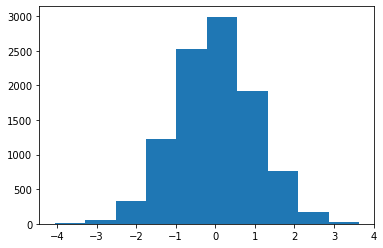

In [6]:
plt.hist(H_set[0,:])

In [7]:
indices = []
for i in range(n):
    if A_set[i] == 1:
        if Z_set[0,i] < 1 and Z_set[1,i] < 2:
            if Z_set[0,i] > 0 and Z_set[1,i] > 0:
                indices.append(i)
# indices

(array([186., 198., 226., 189., 193., 187., 216., 199., 206., 164.]),
 array([1.46652548e-06, 4.99934170e-02, 9.99853675e-02, 1.49977318e-01,
        1.99969269e-01, 2.49961219e-01, 2.99953170e-01, 3.49945120e-01,
        3.99937071e-01, 4.49929021e-01, 4.99920972e-01]),
 <BarContainer object of 10 artists>)

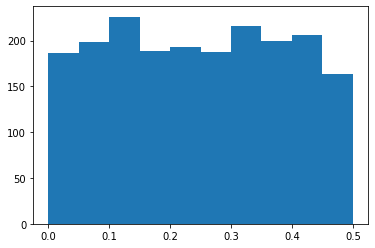

In [8]:
plt.hist(H_set[0, indices])

In [11]:
plt.hist(H_set[1, indices])

IndexError: index 5 is out of bounds for axis 0 with size 1

In [10]:
sum(A_set==1)

5037